In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"top_expensive_leagues.csv")

In [5]:
df.head()

,League ID,League Name,Country,Sport,Revenue (USD),Average Player Salary (USD),Top Team,Total Teams,Founded Year,Viewership
0,L001,Premier League,England,Football,5.275330e+09,12080000.0,Liverpool,16,1886,485.90
1,L002,Serie A,India,American Football,7.088640e+09,6730000.0,Inter Milan,13,1977,135.01
2,L003,IPL,England,American Football,7.930520e+09,14360000.0,Chennai Super Kings,13,1979,157.49
3,L004,La Liga,Spain,American Football,4.972890e+09,13720000.0,Atletico Madrid,22,1999,245.71
4,L005,Serie A,Italy,Basketball,6.265740e+09,7450000.0,Juventus,16,1963,52.83


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   League ID                    700 non-null    object 
 1   League Name                  700 non-null    object 
 2   Country                      700 non-null    object 
 3   Sport                        700 non-null    object 
 4   Revenue (USD)                700 non-null    float64
 5   Average Player Salary (USD)  700 non-null    float64
 6   Top Team                     700 non-null    object 
 7   Total Teams                  700 non-null    int64  
 8   Founded Year                 700 non-null    int64  
 9   Viewership                   700 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 54.8+ KB


In [9]:
df.describe()

,Revenue (USD),Average Player Salary (USD),Total Teams,Founded Year,Viewership
count,7.000000e+02,7.000000e+02,700.000000,700.000000,700.000000
mean,4.280496e+09,7.900443e+06,21.184286,1953.061429,255.944400
std,2.162867e+09,4.100048e+06,6.676591,40.956733,140.300158
min,5.054000e+08,1.010000e+06,10.000000,1880.000000,2.280000
25%,2.522775e+09,4.180000e+06,15.000000,1917.750000,135.077500
50%,4.306905e+09,7.835000e+06,21.000000,1953.500000,250.860000
75%,6.112678e+09,1.148500e+07,27.000000,1989.250000,376.512500
max,7.997000e+09,1.496000e+07,32.000000,2023.000000,499.950000


In [19]:
df.shape

(700, 10)

In [21]:
df.isnull()

,League ID,League Name,Country,Sport,Revenue (USD),Average Player Salary (USD),Top Team,Total Teams,Founded Year,Viewership
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False


In [23]:
df.isnull().any()

League ID                      False
League Name                    False
Country                        False
Sport                          False
Revenue (USD)                  False
Average Player Salary (USD)    False
Top Team                       False
Total Teams                    False
Founded Year                   False
Viewership                     False
dtype: bool

# 1.Which league generates the highest revenue, and how does it compare with the average revenue of all leagues?


In [155]:
df.loc[df['Revenue (USD)'].idxmax()]

League ID                                     L301
League Name                                    IPL
Country                                      Italy
Sport                                      Cricket
Revenue (USD)                         7997000000.0
Average Player Salary (USD)              5670000.0
Top Team                       Chennai Super Kings
Total Teams                                     20
Founded Year                                  1947
Viewership                                  359.82
Name: 300, dtype: object

In [153]:
average_revenue = df['Revenue (USD)'].mean()
print(average_revenue)

4280496485.714286


 # 2) What is the correlation between average player salary and revenue across different leagues?

In [160]:
correlation = df['Revenue (USD)'].corr(df['Average Player Salary (USD)'])
print(correlation)

-0.017688946581012496


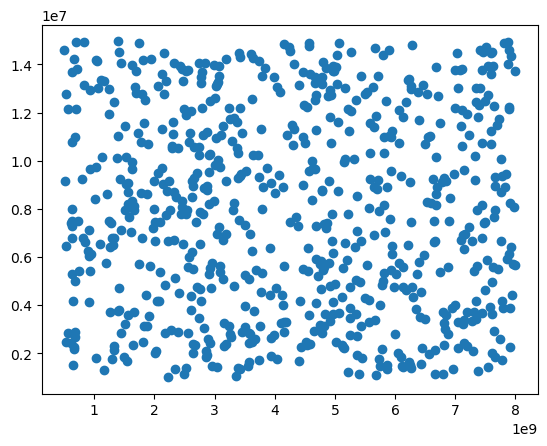

In [166]:
plt.scatter(x='Revenue (USD)', y='Average Player Salary (USD)',data=df)

- No correlation between revenue and average player salary

# 3) Which country has the highest number of leagues, and what is the distribution of sports across those leagues?


In [271]:
country_league_count = df.groupby('Country')['League Name'].nunique().sort_values(ascending=False)

country_with_most_leagues = country_league_count.idxmax()
highest_number_of_leagues = country_league_count.max()

print(country_with_most_leagues)
print(highest_number_of_leagues)

England
8


In [243]:
df.groupby('Sport')['League Name'].nunique().sort_values(ascending=False)

Sport
American Football    8
Basketball           8
Cricket              8
Football             8
Name: League Name, dtype: int64

# 4)How has the founding year of leagues influenced their viewership and revenue in modern times?


In [294]:
df['Founded Year'].corr(df['Viewership'])

-0.0006511718306314183

In [286]:
df['Founded Year'].corr(df['Revenue (USD)'])

0.0480094743111019

- Founding Year of leagues has no influence on their viewership and revenue 

# 5) What is the average viewership of leagues grouped by sport type, and which sport has the highest average viewership?

In [343]:
average_viewership_by_sport = df.groupby('Sport')['Viewership'].mean()
print(average_viewership_by_sport)


Sport
American Football    240.931636
Basketball           242.329769
Cricket              256.344368
Football             281.278670
Name: Viewership, dtype: float64


In [345]:
average_viewership_by_sport = df.groupby('Sport')['Viewership'].mean().sort_values(ascending=False)
print(average_viewership_by_sport)

Sport
Football             281.278670
Cricket              256.344368
Basketball           242.329769
American Football    240.931636
Name: Viewership, dtype: float64


- Football has highest average viewership 